In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df=pd.read_csv('headbrain.csv')

In [75]:
df

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [76]:
df.count()

Gender         237
AgeRange       237
HeadSize       237
BrainWeight    237
dtype: int64

In [77]:
df.isnull()

,Gender,AgeRange,HeadSize,BrainWeight
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
232,False,False,False,False
233,False,False,False,False
234,False,False,False,False
235,False,False,False,False


In [78]:
df.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

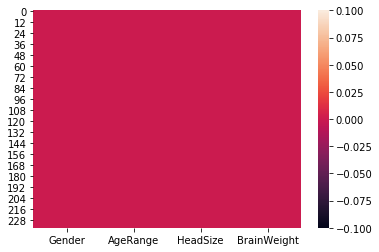

In [79]:
sns.heatmap(df.isnull())

In [80]:
df.shape

(237, 4)

In [81]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(237, 4)
(236, 4)


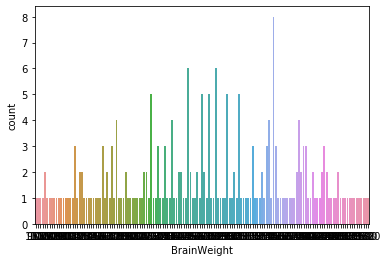

In [82]:
sns.countplot(df1['BrainWeight'])

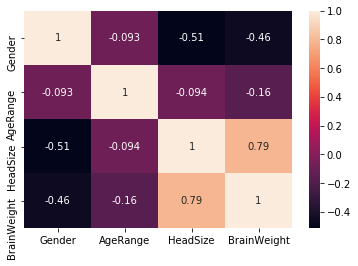

In [83]:
sns.heatmap(df1.corr(),annot=True)

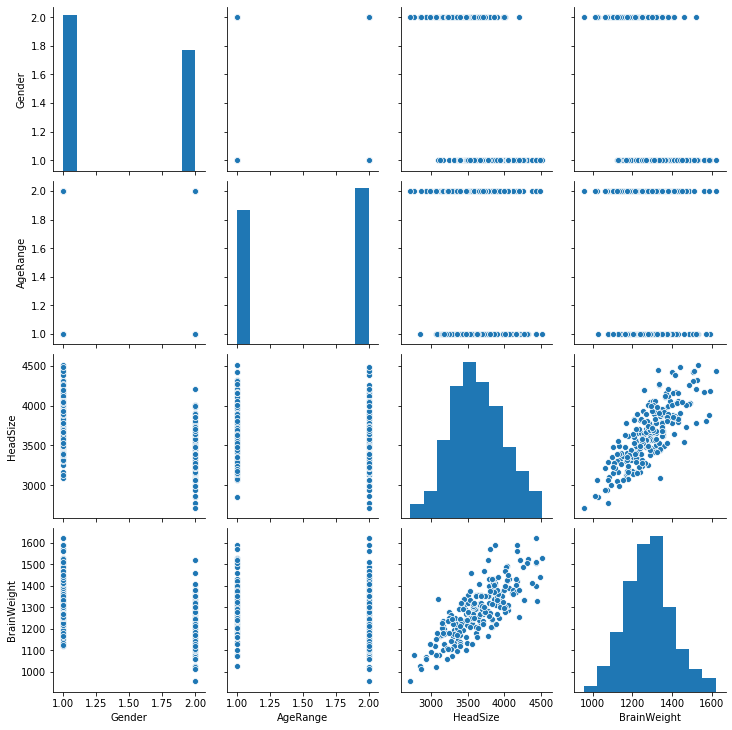

In [84]:
sns.pairplot(df1)

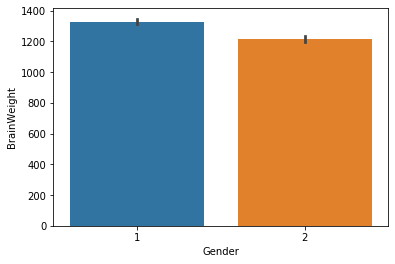

In [85]:
sns.barplot(x='Gender',y='BrainWeight',data=df1)

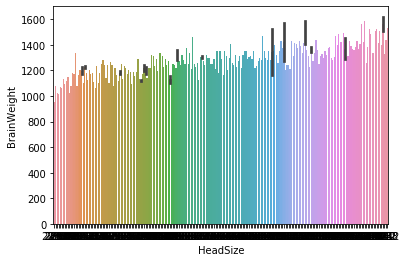

In [86]:
sns.barplot(x='HeadSize',y='BrainWeight',data=df1)

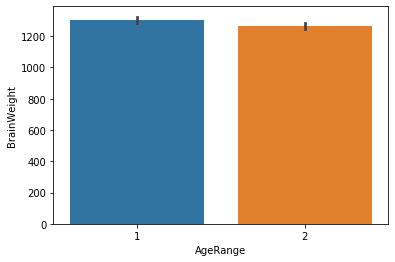

In [87]:
sns.barplot(x='AgeRange',y='BrainWeight',data=df1)

Gender            AxesSubplot(0.125,0.749828;0.227941x0.130172)
AgeRange       AxesSubplot(0.398529,0.749828;0.227941x0.130172)
HeadSize       AxesSubplot(0.672059,0.749828;0.227941x0.130172)
BrainWeight       AxesSubplot(0.125,0.593621;0.227941x0.130172)
dtype: object

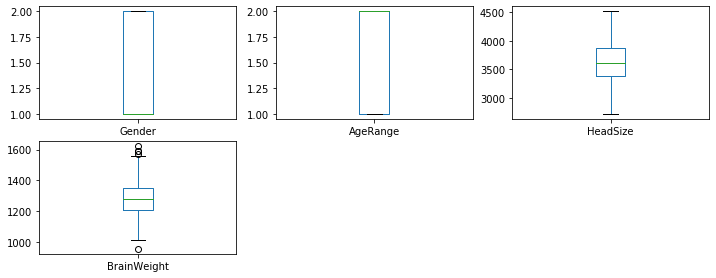

In [88]:
df1.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))

In [89]:
df1.skew()

Gender         0.257959
AgeRange      -0.153968
HeadSize       0.164767
BrainWeight    0.205274
dtype: float64

In [107]:
x=df[['HeadSize']]

In [108]:
y=df[['BrainWeight']]

In [109]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit(x)
x


StandardScaler(copy=True, with_mean=True, with_std=True)

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=43)

TypeError: Singleton array array(StandardScaler(copy=True, with_mean=True, with_std=True),
      dtype=object) cannot be considered a valid collection.

In [100]:
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(79,)

In [101]:
lm=LinearRegression()



In [102]:
lm.fit(x,y)

ValueError: Expected 2D array, got scalar array instead:
array=StandardScaler(copy=True, with_mean=True, with_std=True).
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [103]:
lm.score(x,y)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [104]:
lm.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [105]:
lm.intercept_

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [106]:
pred=lm.predict(x_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.